<a href="https://colab.research.google.com/github/guilleaag/Final-Project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ingest the Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('spotify_churn_dataset.csv')
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


**Data Cleaning**

In [ ]:
# Check missing values
df.isnull().sum()

# Check duplicates
df.duplicated().sum()

# Drop duplicates if any
df = df.drop_duplicates()

# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


**Data Manipulation**

In [ ]:
# Filtering churned users
churned_users = df[df['is_churned'] == True]

# Grouping churn rate by subscription type
churn_by_sub = df.groupby('subscription_type')['is_churned'].mean().sort_values(ascending=False)

# Sorting by listening time
df.sort_values(by='listening_time', ascending=False).head()

# The dataset was grouped by subscription type to calculate churn rate and filtered to analyze differences between active and churned users.

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
5623,5624,Female,28,CA,Student,299,93,0.29,Desktop,0,1,0
5617,5618,Female,57,AU,Family,299,68,0.06,Desktop,0,1,0
5732,5733,Other,17,AU,Student,299,26,0.16,Mobile,0,1,0
863,864,Female,53,DE,Family,299,67,0.38,Web,0,1,0
2957,2958,Other,40,DE,Family,299,43,0.09,Mobile,0,1,1


**Data Visualization**

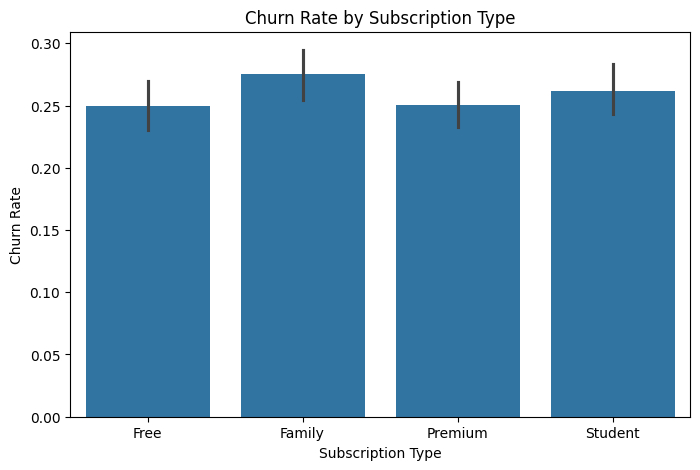

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='subscription_type', y='is_churned', data=df)
plt.title('Churn Rate by Subscription Type')
plt.ylabel('Churn Rate')
plt.xlabel('Subscription Type')
plt.savefig('churn_by_subscription.png')
plt.show()

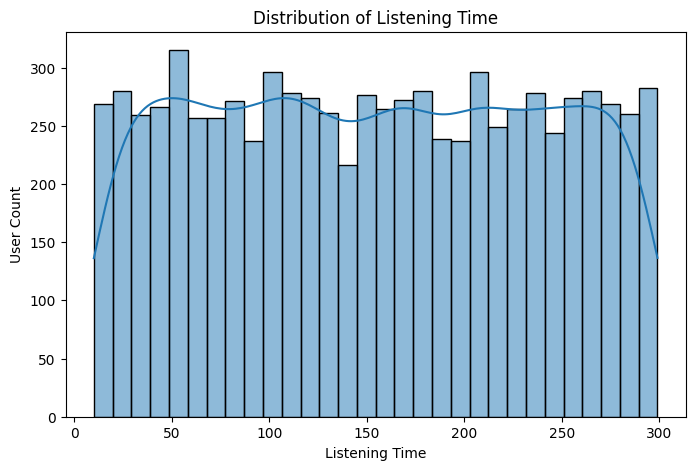

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['listening_time'], bins=30, kde=True)
plt.title('Distribution of Listening Time')
plt.xlabel('Listening Time')
plt.ylabel('User Count')
plt.savefig('listening_time_distribution.png')
plt.show()

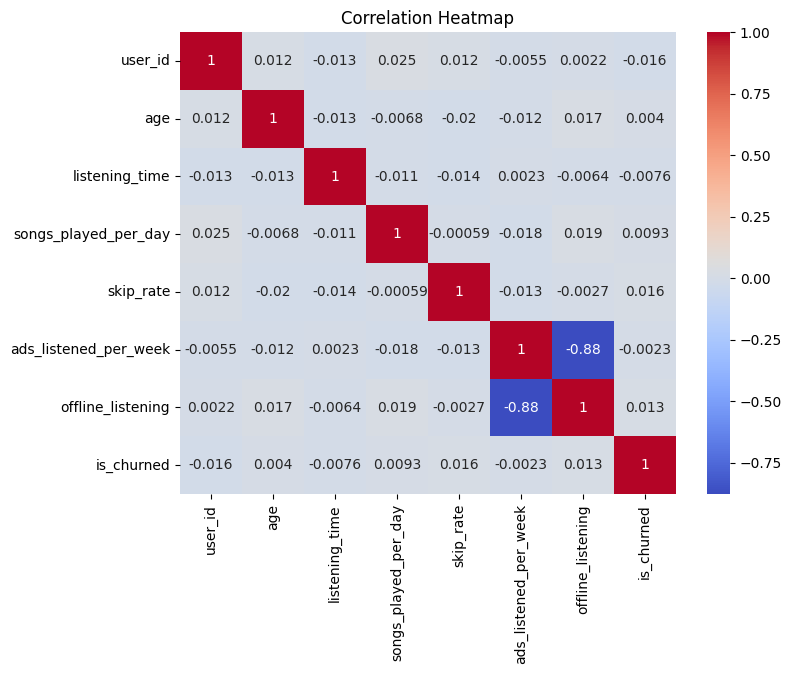

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

Three visualizations were created to explore churn behavior, listening time distribution, and feature correlations.

**Statistical Analysis**

In [ ]:
# Average listening time of churned vs active users
df.groupby('is_churned')['listening_time'].mean()

# Correlation with churn
df.corr(numeric_only=True)['is_churned'].sort_values(ascending=False)

,is_churned
is_churned,1.000000
skip_rate,0.016121
offline_listening,0.012754
songs_played_per_day,0.009314
age,0.003982
ads_listened_per_week,-0.002279
listening_time,-0.007624
user_id,-0.015994


Churned users listened to fewer songs on average and had higher skip rates. The strongest correlation with churn was skip rate and lower listening time.